## Million Songs Dataset

- Download user data from http://millionsongdataset.com/sites/default/files/challenge/train_triplets.txt.zip
- Download song metadata db from http://millionsongdataset.com/sites/default/files/AdditionalFiles/track_metadata.db

In [1]:
import os
import sys
import time
import glob
# import hdf5_getters as GETTERS
import datetime
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
msd_path = os.path.join(path, 'MillionSongSubset')
msd_data_path = os.path.join(msd_path,'data')
msd_user_path = os.path.join(msd_path, 'user')
msd_addf_path = os.path.join(msd_path, 'AdditionalFiles')

In [3]:
# User data:
msd_user_file = os.path.join(msd_user_path, 'train_triplets.txt')
user_data = pd.read_csv(msd_user_file, sep='\t', header = None)
user_data = user_data.rename(columns = {0:'user_id', 1:'song_id', 2:'play_counts'})
unique_song_id = list(set(user_data['song_id']))

In [4]:
print('User data shape:', user_data.shape)
print('Number of unique songs:', len(unique_song_id))

User data shape: (48373586, 3)
Number of unique songs: 384546


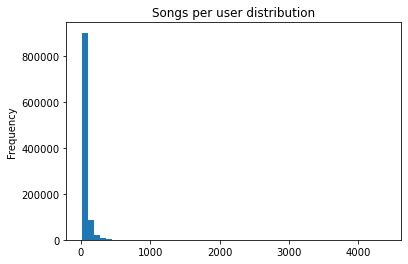

In [35]:
# number of user songs histgram
user_data.groupby('user_id').count()['song_id'].plot(kind='hist', bins=50)
plt.title('Songs per user distribution')
plt.show()

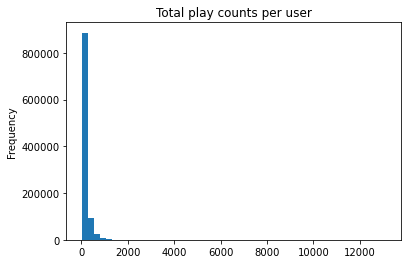

In [36]:
# user play counts sum distribution
user_data.groupby('user_id').sum('play_counts')['play_counts'].plot(kind='hist',bins=50)
plt.title('Total play counts per user')
plt.show()

In [13]:
# Song data:
conn = sqlite3.connect(os.path.join(msd_addf_path, 'track_metadata.db'))
q = "SELECT * FROM songs WHERE song_id IN (" + str(unique_song_id)[1:-1] + ")"
songs = pd.read_sql_query(q, conn)
conn.close()

In [14]:
songs.head(2)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0


In [15]:
# Drop duplicates:
songs = songs.drop_duplicates(subset = ['song_id'], keep = 'first')
print('After dropping songs with duplicated id:', songs.shape)

After dropping songs with duplicated id: (384546, 14)


In [16]:
songs.describe()

,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
count,384546.000000,384546.000000,384546.000000,384546.000000,3.845460e+05,384546.000000,384546.000000
mean,248.042072,0.607126,0.421286,1370.752071,3.840854e+06,1151.090611,605.258767
std,114.698968,0.125423,0.107252,928.597182,2.728392e+06,10001.010433,6116.551981
min,0.522000,-1.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-935.000000
25%,186.487710,0.531081,0.370492,0.000000,1.389383e+06,-1.000000,0.000000
50%,231.392200,0.607671,0.417888,1997.000000,3.370893e+06,-1.000000,0.000000
75%,285.909750,0.686626,0.475740,2005.000000,6.197030e+06,-1.000000,0.000000
max,3034.905670,1.000000,1.082503,2011.000000,9.090644e+06,151042.000000,117257.000000


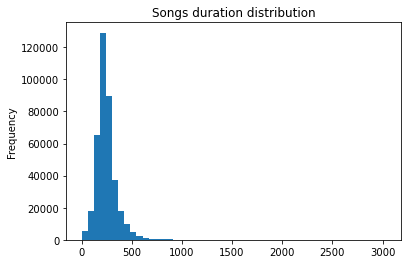

In [33]:
songs['duration'].plot(kind='hist', bins=50)
plt.title('Songs duration distribution')
plt.show()

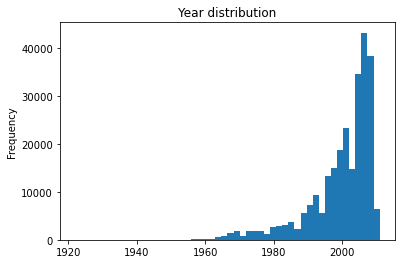

In [32]:
songs[songs['year'] > 0]['year'].plot(kind='hist', bins=50)
plt.title('Year distribution')
plt.show()

In [45]:
user_songs = pd.merge(user_data, songs, how = 'inner', on = ["song_id"])

In [46]:
user_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48373586 entries, 0 to 48373585
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   song_id             object 
 2   play_counts         int64  
 3   track_id            object 
 4   title               object 
 5   release             object 
 6   artist_id           object 
 7   artist_mbid         object 
 8   artist_name         object 
 9   duration            float64
 10  artist_familiarity  float64
 11  artist_hotttnesss   float64
 12  year                int64  
 13  track_7digitalid    int64  
 14  shs_perf            int64  
 15  shs_work            int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 6.1+ GB
